In [1]:
import numpy as np
import matplotlib.pyplot as plt

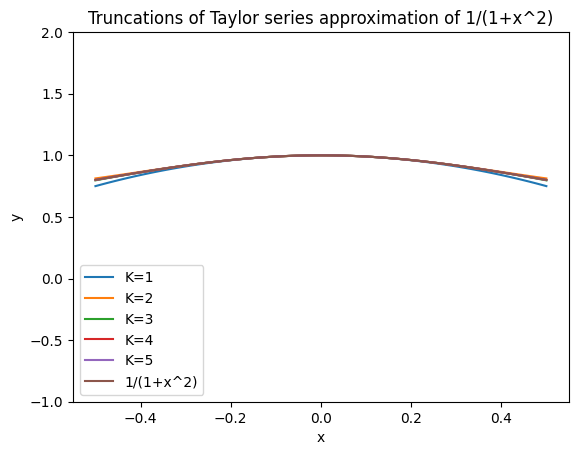

In [2]:
def taylor_series(x, n_terms):
    series_sum = 0
    for n in range(n_terms + 1):
        term = (-1)**n * x**(2*n)
        series_sum += term
    return series_sum

# Example usage
x = 0.5
n_terms = 10
for K in range(1,6):
    x = np.linspace(-0.5,0.5,100)
    y = taylor_series(x, K)
    plt.plot(x, y, label=f'K={K}')
plt.plot(x,1/(1+x**2), label='1/(1+x^2)')
plt.legend()
plt.title('Truncations of Taylor series approximation of 1/(1+x^2)')
plt.ylim(-1,2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



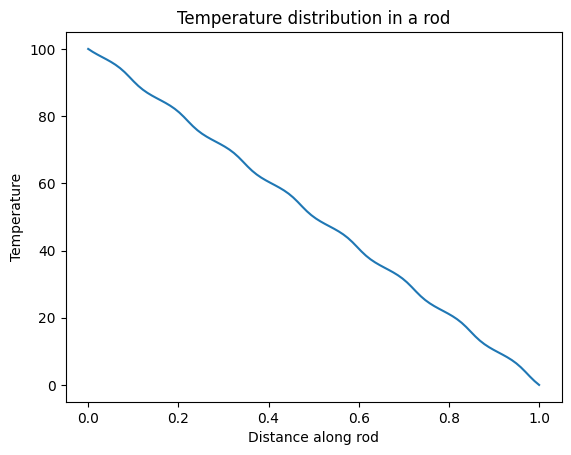

In [42]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# Parameters
a = 100
T0 = 100  # Boundary condition at X=0
Ta = 0  # Boundary condition at X=1
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def solve_second_order_ode(bc, domain, n_points=100, y_guess=None):
   
    # system of ODEs
    def ode_system(x, Y):
        # Y[0] = y, Y[1] = y'
        dy_dx = Y[1]
        d2y_dx2 = -(50*dy_dx*np.cos(50*x))/(np.sin(50*x)+3)  # Define y'' = f(x, y, y')
        return np.vstack([dy_dx, d2y_dx2])

    # Discretize the domain
    x_vals = np.linspace(domain[0], domain[1], n_points)
    
    # Provide an initial guess for y and y'
    if y_guess is None:
        y_guess = np.zeros((2, n_points))  # Default guess: y = 0, y' = 0

    # Solve the boundary value problem
    solution = solve_bvp(ode_system, bc, x_vals, y_guess)

    if not solution.success:
        raise RuntimeError("ODE solver failed to converge!")

    return x_vals, solution
domain = (0, 1)
bc = lambda y0, y1: np.array([y0[0] - T0, y1[0] - Ta])

x_vals, sol = solve_second_order_ode(bc, domain, n_points=100)
plt.plot(x_vals, sol.sol(x_vals)[0])

plt.xlabel('Distance along rod')
plt.ylabel("Temperature")
plt.title('Temperature distribution in a rod')
plt.show()